# Introduction

In this notebook we'll learn how to use NumPy to work with numerical data.

<img src="https://i.imgur.com/dZ1XE9o.png" width=400>


# Import Statements


In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from scipy import misc  # contains an image of a racoon!
from PIL import Image  # for reading image files
from functools import lru_cache


# Understanding NumPy's ndarray

NumPy's most amazing feature is the **powerful** ndarray.

<img src="https://i.imgur.com/1IUqnxX.png" width=200>


In [2]:
def generate_array(*shape:int,dim:int=0,ran:int|tuple=()) -> np.array: #type: ignore
    def array(axes):
        if not shape or shape[axes] <= 0:
            raise ValueError("length must be grater then Zero!!!")
        elif len(shape) == axes + 1:
            if ran:
                if type(ran) == tuple:
                    return list(i for i in range(*ran))
                else:
                    return list(i for i in range(ran)) #type: ignore
            else:
                return list(randint(1,100) for i in range(shape[axes]))
        elif len(shape) > axes:
            return list(array(axes+1) for i in range(shape[axes]))
    if dim:
        shape = [dim for i in range(dim)] #type: ignore
        return np.array(array(0))
    else:
        return np.array(array(0))

def info(array:np.array)->None: #type: ignore
    print(f"The Dimension :- {array.ndim}")
    print(f"The Size :- {array.size}")
    print(f"The Shape :- {array.shape}")
    print(f"The Array :- {array}")

generate_array(dim=2,ran=(4,20))


array([[ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

#### 1-Dimensional Arrays (Vectors)


In [3]:
generate_array(5, 1)

array([[76],
       [51],
       [49],
       [93],
       [53]])

#### 2-Dimensional Arrays (Matrices)


In [4]:
generate_array(5, 2)


array([[48, 20],
       [33, 70],
       [46, 48],
       [16,  7],
       [33,  5]])

#### N-Dimensional Arrays (Tensors)

**Challenge**:

-   How many dimensions does the array below have?
-   What is its shape (i.e., how many elements are along each axis)?
-   Try to access the value `18` in the last line of code.
-   Try to retrieve a 1 dimensional vector with the values `[97, 0, 27, 18]`
-   Try to retrieve a (3,2) matrix with the values `[[ 0,  4], [ 7,  5], [ 5, 97]]`

_Hint_: You can use the `:` operator just as with Python Lists.


In [5]:
mystery_array = np.array(
    [
        [[0, 1, 2, 3], [4, 5, 6, 7]],
        [[7, 86, 6, 98], [5, 1, 0, 4]],
        [[5, 36, 32, 48], [97, 0, 27, 18]],
    ]
)

In [6]:
mystery_array.ndim

3

In [7]:
mystery_array.shape


(3, 2, 4)

In [8]:
print(mystery_array[-1][-1][-1])
print(mystery_array[2][1][3])

18
18


In [9]:
print(mystery_array[2][1])
print(mystery_array[:,:,0])

[97  0 27 18]
[[ 0  4]
 [ 7  5]
 [ 5 97]]


# NumPy Mini-Challenges


#### **Challenge 1**: Use [`.arange()`](https://numpy.org/devdocs/reference/generated/numpy.arange.html)to createa a vector `a` with values ranging from 10 to 29. You should get this:

`print(a)`

`[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]`


In [10]:
a = np.arange(10,30)
print(a)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]


#### **Challenge 2**: Use Python slicing techniques on `a` to:

-   Create an array containing only the last 3 values of `a`
-   Create a subset with only the 4th, 5th, and 6th values
-   Create a subset of `a` containing all the values except for the first 12 (i.e., `[22, 23, 24, 25, 26, 27, 28, 29]`)
-   Create a subset that only contains the even numbers (i.e, every second number)


In [11]:
last_3_a = a[-3:]
print(f"The Value Of last_3_a :- {last_3_a}")
subset_4_5_6 = a[3:6]
print(f"The Value Of subset_4_5_6 :- {subset_4_5_6}")
subset_after_index_12 = a[12:]
print(f"The Value Of subset_after_index_12 :- {subset_after_index_12}")
subset_with_even_number = a[::2]
print(f"The Value Of subset_with_even_number :- {subset_with_even_number}")

The Value Of last_3_a :- [27 28 29]
The Value Of subset_4_5_6 :- [13 14 15]
The Value Of subset_after_index_12 :- [22 23 24 25 26 27 28 29]
The Value Of subset_with_even_number :- [10 12 14 16 18 20 22 24 26 28]


#### **Challenge 3**:Reverse the order of the values in `a`, so that the first element comes last:

`[29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10]`

If you need a hint, you can check out this part of the [NumPy beginner's guide](https://numpy.org/devdocs/user/absolute_beginners.html#how-to-reverse-an-array)


In [12]:
reversed_a = a[::-1]
# or 
reversed_a = np.flip(a)
info(reversed_a)


The Dimension :- 1
The Size :- 20
The Shape :- (20,)
The Array :- [29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10]


#### **Challenge 4**: Print out all the indices of the non-zero elements in this array: [6,0,9,0,0,5,0]


In [13]:
new_array = np.array([6,0,9,0,0,5,0])
[print(j) for i,j in zip(new_array,range(len(new_array))) if i != 0]
# or
non_zero_indexes = np.nonzero(new_array)
non_zero_indexes

0
2
5


(array([0, 2, 5], dtype=int64),)

#### **Challenge 5**: Use NumPy to generate a 3x3x3 array with random numbers

Hint: Use the [`.random()` function](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random)


In [14]:
random_array = np.random.random([3,3,3])
random_array

array([[[0.93531078, 0.49378887, 0.7963476 ],
        [0.19490338, 0.62170158, 0.86996937],
        [0.10527704, 0.68747205, 0.82718795]],

       [[0.25020426, 0.27511131, 0.43237208],
        [0.93026585, 0.98507182, 0.92833754],
        [0.02653829, 0.08152818, 0.03893101]],

       [[0.99227385, 0.3004113 , 0.50056954],
        [0.06899436, 0.12766844, 0.60077264],
        [0.41281631, 0.73188385, 0.55053535]]])

#### **Challenge 6**: Use [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create a vector `x` of size 9 with values spaced out evenly between 0 to 100 (both included).


In [15]:
x = np.linspace(0,100,num=9)

#### **Challenge 7**: Use [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create another vector `y` of size 9 with values between -3 to 3 (both included). Then plot `x` and `y` on a line chart using Matplotlib.


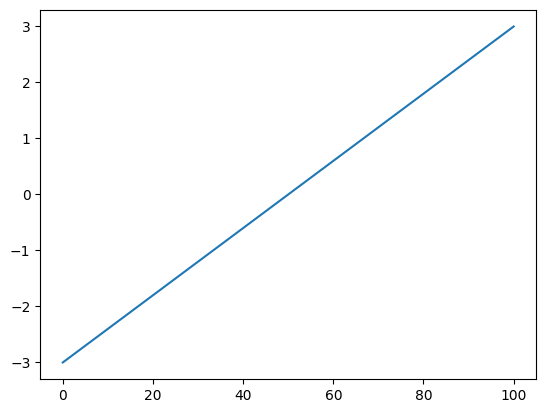

In [16]:
y = np.linspace(start=-3,stop=3,num=9)

plt.plot(x,y)

#### **Challenge 8**: Use NumPy to generate an array called `noise` with shape 128x128x3 that has random values. Then use Matplotlib's [`.imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) to display the array as an image.


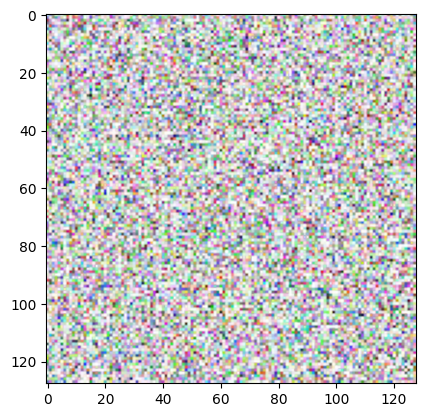

In [17]:
noise = np.random.random([128,128,4])
plt.imshow(noise)

# Linear Algebra with Vectors


In [18]:
v1 = np.array([4, 5, 2, 7])
v2 = np.array([2, 1, 3, 3])
new_v = v1 + v2

In [19]:
# Python Lists vs ndarrays
list1 = [4, 5, 2, 7]
list2 = [2, 1, 3, 3]
list1 + list2


[4, 5, 2, 7, 2, 1, 3, 3]

In [20]:
mul_v = v1 * v2 

In [21]:
div_v = v2 / v1
div_v

array([0.5       , 0.2       , 1.5       , 0.42857143])

# Broadcasting and Scalars


In [22]:
mul_v * 69

array([ 552,  345,  414, 1449])

In [23]:
array_x = generate_array(dim=3)
array_x * 2 / 69

array([[[1.53623188, 1.73913043, 0.20289855],
        [1.85507246, 0.57971014, 2.55072464],
        [0.75362319, 2.4057971 , 1.5942029 ]],

       [[0.72463768, 0.11594203, 1.33333333],
        [2.8115942 , 1.2173913 , 1.91304348],
        [0.46376812, 1.33333333, 0.02898551]],

       [[2.20289855, 2.28985507, 0.11594203],
        [1.76811594, 2.7826087 , 1.94202899],
        [1.5942029 , 0.7826087 , 0.8115942 ]]])

# Matrix Multiplication with @ and .matmul()

<img src=https://i.imgur.com/LCdhmi8.png width=350>


In [24]:
a1 = np.array([[1, 3], [0, 1], [6, 2], [9, 7]])

b1 = np.array([[4, 1, 3], [5, 8, 5]])

print(f"{a1.shape}: a has {a1.shape[0]} rows and {a1.shape[1]} columns.")
print(f"{b1.shape}: b has {b1.shape[0]} rows and {b1.shape[1]} columns.")
print("Dimensions of result: (4x2)*(2x3)=(4x3)")

(4, 2): a has 4 rows and 2 columns.
(2, 3): b has 2 rows and 3 columns.
Dimensions of result: (4x2)*(2x3)=(4x3)


**Challenge**: Let's multiply `a1` with `b1`. Looking at the wikipedia example above, work out the values for c12 and c33 on paper. Then use the [`.matmul()`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) function or the `@` operator to check your work.


In [25]:
np.matmul(a1,b1)[0,1:]

array([25, 18])

# Manipulating Images as ndarrays


C:\Users\nicoz\AppData\Local\Temp\ipykernel_1432\1403994607.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


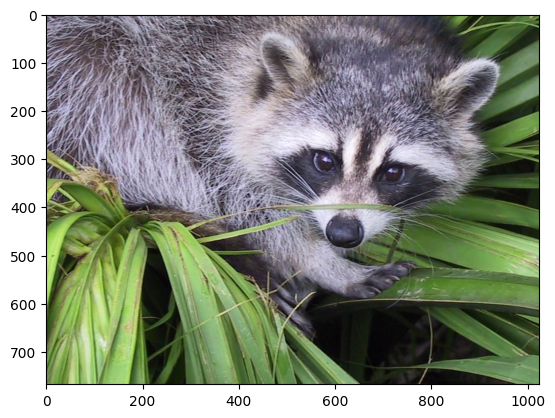

In [26]:
img = misc.face()
plt.imshow(img)

In [27]:
print(img)

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 87 106  76]
  [ 94 110  81]
  [107 124  92]
  ...
  [120 158  97]
  [119 157  96]
  [119 158  95]]

 [[ 85 101  72]
  [ 95 111  82]
  [112 127  96]
  ...
  [121 157  96]
  [120 156  94]
  [120 156  94]]

 [[ 85 101  74]
  [ 97 113  84]
  [111 126  97]
  ...
  [120 156  95]
  [119 155  93]
  [118 154  92]]]


**Challenge**: What is the data type of `img`? Also, what is the shape of `img` and how many dimensions does it have? What is the resolution of the image?


In [28]:
print(f"The Shape of img:- {img.shape}")

The Shape of img:- (768, 1024, 3)


In [29]:
print(f"The Dimension of img:- {img.ndim}")

The Dimension of img:- 3


In [30]:
print(f"The Resolution of img:- {img.shape[:-1]}")

The Resolution of img:- (768, 1024)


**Challenge**: Convert the image to black and white. The values in our `img` range from 0 to 255.

-   Divide all the values by 255 to convert them to sRGB, where all the values are between 0 and 1.
-   Next, multiply the sRGB array by the `grey_vals` to convert the image to grey scale.
-   Finally use Matplotlib's [`.imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) together with the colormap parameter set to gray `cmap=gray` to look at the results.


In [31]:
grey_vals = np.array([0.2126, 0.7152, 0.0722])


In [32]:
new_img = img / 255 

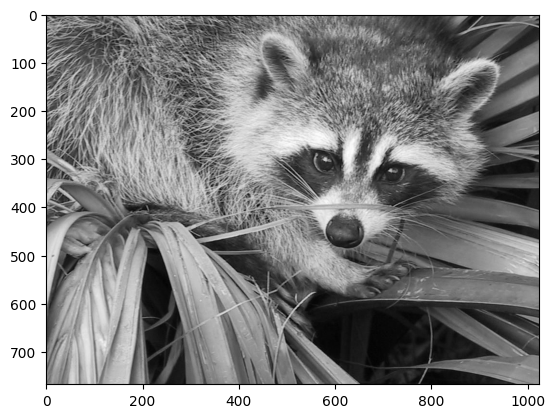

In [33]:
gray_img = new_img @ grey_vals
plt.imshow(gray_img,cmap="gray")

**Challenge**: Can you manipulate the images by doing some operations on the underlying ndarrays? See if you can change the values in the ndarray so that:

1. You flip the grayscale image upside down

<img src=https://i.imgur.com/r36CigD.png>

2. Rotate the colour image

<img src=https://i.imgur.com/IiNylco.png>

3. Invert (i.e., solarize) the colour image. To do this you need to converting all the pixels to their "opposite" value, so black (0) becomes white (255).

<img src=https://i.imgur.com/cfFbuex.png>


#### Challenge Solutions


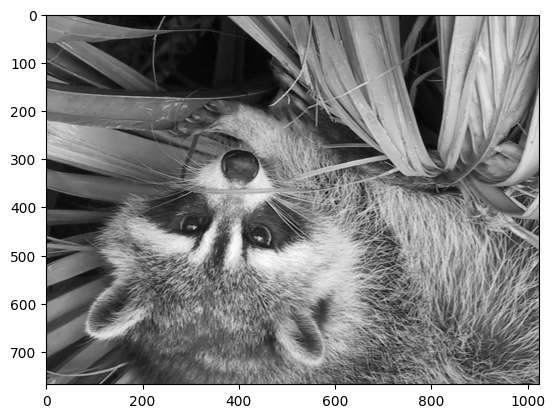

In [34]:
plt.imshow(np.flip(gray_img),cmap="gray")

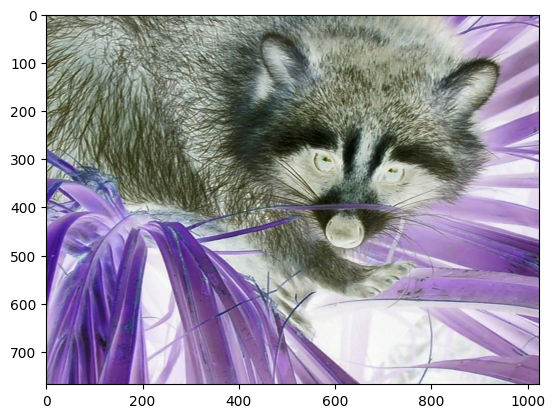

In [35]:
# plt.imshow(np.rot90(img))
plt.imshow(255 - img)

# Use your Own Image!


In [36]:
file_name = "yummy_macarons.jpg"
img = Image.open(file_name)
img = np.array(img)


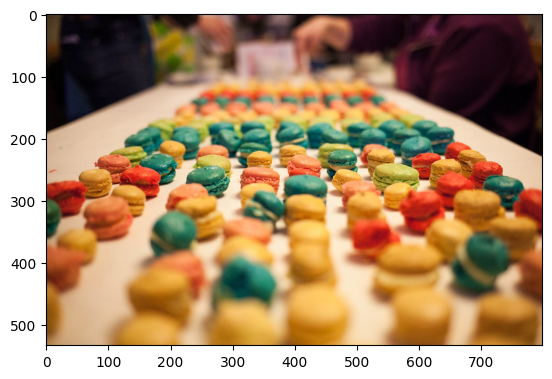

In [37]:
plt.imshow(img)

#### Use PIL to open
